Crop_Prediction_using_Deep Learning_CNN

In [1]:
#import libraries
import os
import cv2
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

#for accuracy and loss graph
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.10.0'

In [3]:
train_data_path=r"C:\Users\user\Desktop\Data_Science _Project\Project _For Experience\Crop predtion and recondeation cure app\train\train"
#train_data_path = "/content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/data/train"
validation_data_path = r"C:\Users\user\Desktop\Data_Science _Project\Project _For Experience\Crop predtion and recondeation cure app\val\val"

In [4]:
train_data_path.index

<function str.index>

In [20]:
#Show Augmented image
def plotImages(image_arr):
    fig,axes =plt.subplots(1,5,figsize=(20,20))
    axes= axes.flatten()
    for img, ax in zip(image_arr,axes):
        ax.imshow(img)
        plt.tight_layout()
        plt.show()

In [6]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datgen=ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [7]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data=training_datgen.flow_from_directory(train_data_path,# this is the target directory
                                                target_size=(150, 150),# all images will be resized to 150x150
                                                class_mode='binary',#number of images in each batch of data.
                                                batch_size=32)# since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [8]:
training_data.class_indices # check how many diffrent class es are there

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [9]:
# this is the augmentation configuration we will use for validation:
# only rescaling beacuse wea are taking one by one image to check
valid_datagen=ImageDataGenerator(rescale=1/255)

In [10]:
# this is a similar generator, for validation data
valid_data=valid_datagen.flow_from_directory(validation_data_path,# this is the target directory
                                                target_size=(150, 150),# all images will be resized to 150x150
                                                class_mode='binary',#number of images in each batch of data.
                                                batch_size=32)# since we use binary_crossentropy loss, we need binary labels

Found 324 images belonging to 4 classes.


# showing augmented images

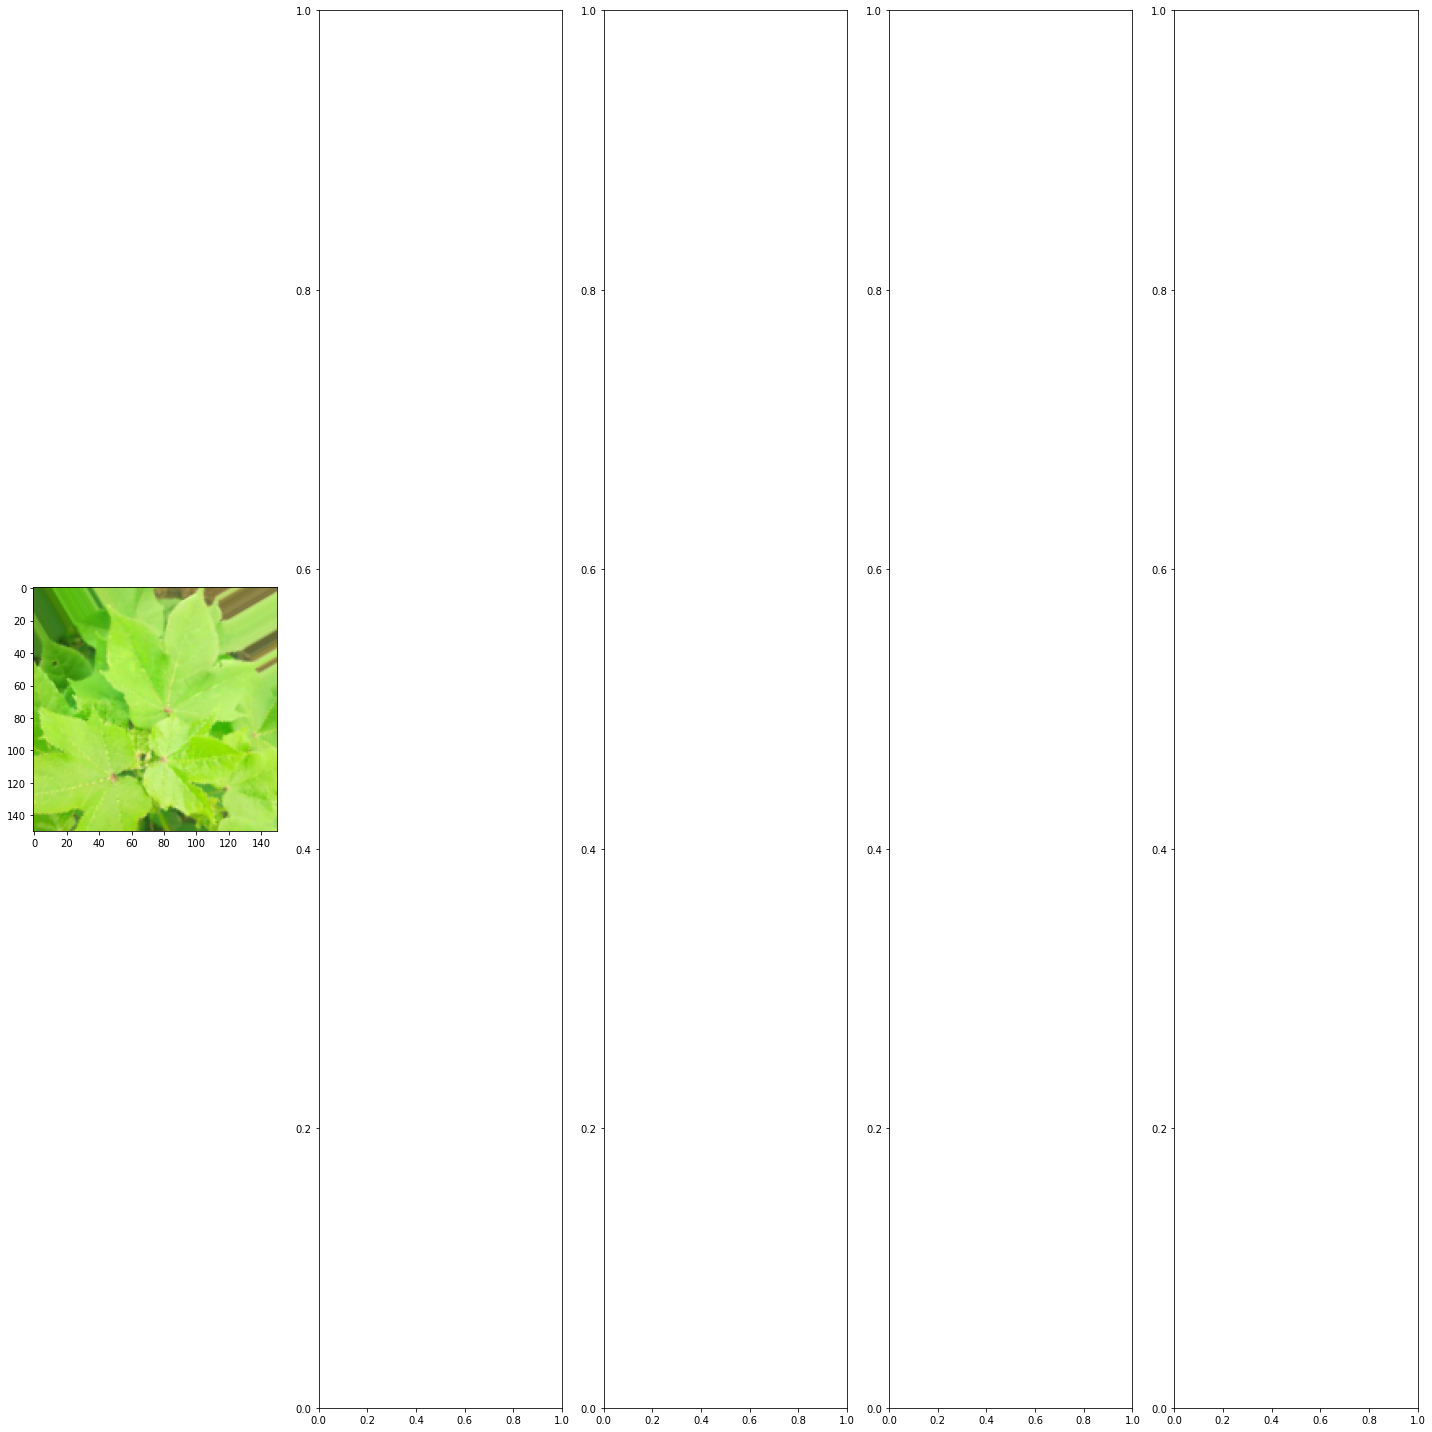

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

# save best model whose validation accuracy is high using vall accuracy

In [12]:

modelpath=r"C:\Users\user\Desktop\Data_Science _Project\Project _For Experience\Crop predtion and recondeation cure app\v4_pred_cott_dis.h5"
checkpoint=ModelCheckpoint(modelpath,monitor="val_accuracy",verbose=1, save_best_only=True,mode="max")
callbacks_list=[checkpoint]

# Building CNN model

In [13]:

cnn_model= keras.models.Sequential([
     
                                    keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64,kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128,kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256,kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
          
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(), #Building neurl network
                                    keras.layers.Dense(units=128, activation="relu"), #input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation="relu"),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4, activation="Softmax"),#output layers
])

# Compile CNN model

In [14]:
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
# Train cnn model
history=cnn_model.fit(training_data,
                      epochs=380, 
                      verbose=1,
                      validation_data=valid_data,
                      callbacks=callbacks_list) # time start 16.06
                     

Epoch 1/380
61/61 [==============================] - ETA: 0s - loss: 1.2610 - accuracy: 0.4346
Epoch 1: val_accuracy improved from -inf to 0.44136, saving model to C:\Users\user\Desktop\Data_Science _Project\Project _For Experience\Crop predtion and recondeation cure app\v4_pred_cott_dis.h5
61/61 [==============================] - 86s 1s/step - loss: 1.2610 - accuracy: 0.4346 - val_loss: 1.1068 - val_accuracy: 0.4414
Epoch 2/380
61/61 [==============================] - ETA: 0s - loss: 1.0281 - accuracy: 0.5551
Epoch 2: val_accuracy improved from 0.44136 to 0.65432, saving model to C:\Users\user\Desktop\Data_Science _Project\Project _For Experience\Crop predtion and recondeation cure app\v4_pred_cott_dis.h5
61/61 [==============================] - 87s 1s/step - loss: 1.0281 - accuracy: 0.5551 - val_loss: 0.8436 - val_accuracy: 0.6543
Epoch 3/380
61/61 [==============================] - ETA: 0s - loss: 0.9143 - accuracy: 0.6253
Epoch 3: val_accuracy did not improve from 0.65432
61/61 [==

Epoch 27/380
61/61 [==============================] - ETA: 0s - loss: 0.4373 - accuracy: 0.8350
Epoch 27: val_accuracy did not improve from 0.84568
61/61 [==============================] - 91s 1s/step - loss: 0.4373 - accuracy: 0.8350 - val_loss: 0.5123 - val_accuracy: 0.8148
Epoch 28/380
61/61 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.8416
Epoch 28: val_accuracy did not improve from 0.84568
61/61 [==============================] - 92s 1s/step - loss: 0.3989 - accuracy: 0.8416 - val_loss: 0.4020 - val_accuracy: 0.8333
Epoch 29/380
61/61 [==============================] - ETA: 0s - loss: 0.4017 - accuracy: 0.8467
Epoch 29: val_accuracy did not improve from 0.84568
61/61 [==============================] - 100s 2s/step - loss: 0.4017 - accuracy: 0.8467 - val_loss: 0.8113 - val_accuracy: 0.6852
Epoch 30/380
61/61 [==============================] - ETA: 0s - loss: 0.3709 - accuracy: 0.8565
Epoch 30: val_accuracy did not improve from 0.84568
61/61 [=============

Epoch 54/380
61/61 [==============================] - ETA: 0s - loss: 0.2720 - accuracy: 0.8970
Epoch 54: val_accuracy did not improve from 0.93827
61/61 [==============================] - 88s 1s/step - loss: 0.2720 - accuracy: 0.8970 - val_loss: 0.2434 - val_accuracy: 0.8951
Epoch 55/380
61/61 [==============================] - ETA: 0s - loss: 0.2920 - accuracy: 0.8960
Epoch 55: val_accuracy did not improve from 0.93827
61/61 [==============================] - 96s 2s/step - loss: 0.2920 - accuracy: 0.8960 - val_loss: 0.2965 - val_accuracy: 0.8951
Epoch 56/380
61/61 [==============================] - ETA: 0s - loss: 0.2799 - accuracy: 0.8995
Epoch 56: val_accuracy did not improve from 0.93827
61/61 [==============================] - 99s 2s/step - loss: 0.2799 - accuracy: 0.8995 - val_loss: 0.2898 - val_accuracy: 0.8673
Epoch 57/380
61/61 [==============================] - ETA: 0s - loss: 0.2963 - accuracy: 0.8872
Epoch 57: val_accuracy did not improve from 0.93827
61/61 [==============

61/61 [==============================] - 80s 1s/step - loss: 0.2233 - accuracy: 0.9165 - val_loss: 0.1368 - val_accuracy: 0.9568
Epoch 83/380
61/61 [==============================] - ETA: 0s - loss: 0.2742 - accuracy: 0.9062
Epoch 83: val_accuracy did not improve from 0.96605
61/61 [==============================] - 79s 1s/step - loss: 0.2742 - accuracy: 0.9062 - val_loss: 0.1955 - val_accuracy: 0.9321
Epoch 84/380
61/61 [==============================] - ETA: 0s - loss: 0.2244 - accuracy: 0.9185
Epoch 84: val_accuracy did not improve from 0.96605
61/61 [==============================] - 81s 1s/step - loss: 0.2244 - accuracy: 0.9185 - val_loss: 0.2007 - val_accuracy: 0.9198
Epoch 85/380
61/61 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.9036
Epoch 85: val_accuracy did not improve from 0.96605
61/61 [==============================] - 80s 1s/step - loss: 0.2536 - accuracy: 0.9036 - val_loss: 0.1449 - val_accuracy: 0.9506
Epoch 86/380
61/61 [====================

Epoch 111/380
61/61 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.9252
Epoch 111: val_accuracy did not improve from 0.97840
61/61 [==============================] - 89s 1s/step - loss: 0.2018 - accuracy: 0.9252 - val_loss: 0.0858 - val_accuracy: 0.9722
Epoch 112/380
61/61 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.9308
Epoch 112: val_accuracy did not improve from 0.97840
61/61 [==============================] - 89s 1s/step - loss: 0.2033 - accuracy: 0.9308 - val_loss: 0.2047 - val_accuracy: 0.9198
Epoch 113/380
61/61 [==============================] - ETA: 0s - loss: 0.2300 - accuracy: 0.9139
Epoch 113: val_accuracy did not improve from 0.97840
61/61 [==============================] - 88s 1s/step - loss: 0.2300 - accuracy: 0.9139 - val_loss: 0.1963 - val_accuracy: 0.9321
Epoch 114/380
61/61 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.9313
Epoch 114: val_accuracy did not improve from 0.97840
61/61 [======

61/61 [==============================] - 101s 2s/step - loss: 0.1510 - accuracy: 0.9513 - val_loss: 0.1050 - val_accuracy: 0.9599
Epoch 141/380
61/61 [==============================] - ETA: 0s - loss: 0.1752 - accuracy: 0.9400
Epoch 141: val_accuracy did not improve from 0.97840
61/61 [==============================] - 100s 2s/step - loss: 0.1752 - accuracy: 0.9400 - val_loss: 0.1960 - val_accuracy: 0.9444
Epoch 142/380
61/61 [==============================] - ETA: 0s - loss: 0.2035 - accuracy: 0.9308
Epoch 142: val_accuracy did not improve from 0.97840
61/61 [==============================] - 106s 2s/step - loss: 0.2035 - accuracy: 0.9308 - val_loss: 0.1538 - val_accuracy: 0.9537
Epoch 143/380
61/61 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.9334
Epoch 143: val_accuracy did not improve from 0.97840
61/61 [==============================] - 91s 1s/step - loss: 0.1821 - accuracy: 0.9334 - val_loss: 0.1168 - val_accuracy: 0.9568
Epoch 144/380
61/61 [==========

61/61 [==============================] - ETA: 0s - loss: 0.1442 - accuracy: 0.9487
Epoch 169: val_accuracy did not improve from 0.98148
61/61 [==============================] - 91s 1s/step - loss: 0.1442 - accuracy: 0.9487 - val_loss: 0.0983 - val_accuracy: 0.9753
Epoch 170/380
61/61 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.9380
Epoch 170: val_accuracy did not improve from 0.98148
61/61 [==============================] - 92s 1s/step - loss: 0.1862 - accuracy: 0.9380 - val_loss: 0.0721 - val_accuracy: 0.9753
Epoch 171/380
61/61 [==============================] - ETA: 0s - loss: 0.1503 - accuracy: 0.9457
Epoch 171: val_accuracy did not improve from 0.98148
61/61 [==============================] - 98s 2s/step - loss: 0.1503 - accuracy: 0.9457 - val_loss: 0.1588 - val_accuracy: 0.9290
Epoch 172/380
61/61 [==============================] - ETA: 0s - loss: 0.1668 - accuracy: 0.9390
Epoch 172: val_accuracy did not improve from 0.98148
61/61 [====================

61/61 [==============================] - 95s 2s/step - loss: 0.1356 - accuracy: 0.9462 - val_loss: 0.0891 - val_accuracy: 0.9722
Epoch 199/380
61/61 [==============================] - ETA: 0s - loss: 0.1354 - accuracy: 0.9487
Epoch 199: val_accuracy did not improve from 0.98148
61/61 [==============================] - 101s 2s/step - loss: 0.1354 - accuracy: 0.9487 - val_loss: 0.1001 - val_accuracy: 0.9630
Epoch 200/380
61/61 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9539
Epoch 200: val_accuracy did not improve from 0.98148
61/61 [==============================] - 101s 2s/step - loss: 0.1327 - accuracy: 0.9539 - val_loss: 0.2037 - val_accuracy: 0.9321
Epoch 201/380
61/61 [==============================] - ETA: 0s - loss: 0.1376 - accuracy: 0.9539
Epoch 201: val_accuracy did not improve from 0.98148
61/61 [==============================] - 101s 2s/step - loss: 0.1376 - accuracy: 0.9539 - val_loss: 0.1077 - val_accuracy: 0.9630
Epoch 202/380
61/61 [==========

Epoch 228/380
61/61 [==============================] - ETA: 0s - loss: 0.1230 - accuracy: 0.9575
Epoch 228: val_accuracy did not improve from 0.98148
61/61 [==============================] - 87s 1s/step - loss: 0.1230 - accuracy: 0.9575 - val_loss: 0.1120 - val_accuracy: 0.9660
Epoch 229/380
61/61 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.9595
Epoch 229: val_accuracy did not improve from 0.98148
61/61 [==============================] - 87s 1s/step - loss: 0.1177 - accuracy: 0.9595 - val_loss: 0.0936 - val_accuracy: 0.9691
Epoch 230/380
61/61 [==============================] - ETA: 0s - loss: 0.1277 - accuracy: 0.9523
Epoch 230: val_accuracy did not improve from 0.98148
61/61 [==============================] - 87s 1s/step - loss: 0.1277 - accuracy: 0.9523 - val_loss: 0.1379 - val_accuracy: 0.9444
Epoch 231/380
61/61 [==============================] - ETA: 0s - loss: 0.1139 - accuracy: 0.9600
Epoch 231: val_accuracy did not improve from 0.98148
61/61 [======

Epoch 257/380
61/61 [==============================] - ETA: 0s - loss: 0.1230 - accuracy: 0.9569
Epoch 257: val_accuracy did not improve from 0.98457
61/61 [==============================] - 93s 2s/step - loss: 0.1230 - accuracy: 0.9569 - val_loss: 0.1503 - val_accuracy: 0.9506
Epoch 258/380
61/61 [==============================] - ETA: 0s - loss: 0.1036 - accuracy: 0.9646
Epoch 258: val_accuracy did not improve from 0.98457
61/61 [==============================] - 91s 1s/step - loss: 0.1036 - accuracy: 0.9646 - val_loss: 0.1038 - val_accuracy: 0.9568
Epoch 259/380
61/61 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9651
Epoch 259: val_accuracy did not improve from 0.98457
61/61 [==============================] - 93s 2s/step - loss: 0.1018 - accuracy: 0.9651 - val_loss: 0.1150 - val_accuracy: 0.9568
Epoch 260/380
61/61 [==============================] - ETA: 0s - loss: 0.1163 - accuracy: 0.9544
Epoch 260: val_accuracy did not improve from 0.98457
61/61 [======

61/61 [==============================] - 93s 2s/step - loss: 0.0959 - accuracy: 0.9692 - val_loss: 0.0917 - val_accuracy: 0.9691
Epoch 287/380
61/61 [==============================] - ETA: 0s - loss: 0.0791 - accuracy: 0.9723
Epoch 287: val_accuracy did not improve from 0.98457
61/61 [==============================] - 94s 2s/step - loss: 0.0791 - accuracy: 0.9723 - val_loss: 0.1641 - val_accuracy: 0.9506
Epoch 288/380
61/61 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.9646
Epoch 288: val_accuracy did not improve from 0.98457
61/61 [==============================] - 93s 2s/step - loss: 0.0977 - accuracy: 0.9646 - val_loss: 0.0751 - val_accuracy: 0.9753
Epoch 289/380
61/61 [==============================] - ETA: 0s - loss: 0.0924 - accuracy: 0.9621
Epoch 289: val_accuracy did not improve from 0.98457
61/61 [==============================] - 92s 2s/step - loss: 0.0924 - accuracy: 0.9621 - val_loss: 0.1118 - val_accuracy: 0.9599
Epoch 290/380
61/61 [=============

Epoch 316/380
61/61 [==============================] - ETA: 0s - loss: 0.0851 - accuracy: 0.9687
Epoch 316: val_accuracy did not improve from 0.98457
61/61 [==============================] - 88s 1s/step - loss: 0.0851 - accuracy: 0.9687 - val_loss: 0.1078 - val_accuracy: 0.9599
Epoch 317/380
61/61 [==============================] - ETA: 0s - loss: 0.1092 - accuracy: 0.9616
Epoch 317: val_accuracy did not improve from 0.98457
61/61 [==============================] - 88s 1s/step - loss: 0.1092 - accuracy: 0.9616 - val_loss: 0.0821 - val_accuracy: 0.9660
Epoch 318/380
61/61 [==============================] - ETA: 0s - loss: 0.0956 - accuracy: 0.9667
Epoch 318: val_accuracy did not improve from 0.98457
61/61 [==============================] - 87s 1s/step - loss: 0.0956 - accuracy: 0.9667 - val_loss: 0.1534 - val_accuracy: 0.9414
Epoch 319/380
61/61 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0.9672
Epoch 319: val_accuracy did not improve from 0.98457
61/61 [======

61/61 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9682
Epoch 345: val_accuracy did not improve from 0.98457
61/61 [==============================] - 103s 2s/step - loss: 0.0897 - accuracy: 0.9682 - val_loss: 0.1235 - val_accuracy: 0.9537
Epoch 346/380
61/61 [==============================] - ETA: 0s - loss: 0.0775 - accuracy: 0.9723
Epoch 346: val_accuracy did not improve from 0.98457
61/61 [==============================] - 99s 2s/step - loss: 0.0775 - accuracy: 0.9723 - val_loss: 0.0592 - val_accuracy: 0.9753
Epoch 347/380
61/61 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9744
Epoch 347: val_accuracy did not improve from 0.98457
61/61 [==============================] - 96s 2s/step - loss: 0.0698 - accuracy: 0.9744 - val_loss: 0.0427 - val_accuracy: 0.9846
Epoch 348/380
61/61 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9728
Epoch 348: val_accuracy did not improve from 0.98457
61/61 [===================

61/61 [==============================] - ETA: 0s - loss: 0.0754 - accuracy: 0.9739
Epoch 373: val_accuracy did not improve from 0.99074
61/61 [==============================] - 102s 2s/step - loss: 0.0754 - accuracy: 0.9739 - val_loss: 0.0908 - val_accuracy: 0.9660
Epoch 374/380
61/61 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9728
Epoch 374: val_accuracy did not improve from 0.99074
61/61 [==============================] - 101s 2s/step - loss: 0.0755 - accuracy: 0.9728 - val_loss: 0.0490 - val_accuracy: 0.9815
Epoch 375/380
61/61 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9723
Epoch 375: val_accuracy did not improve from 0.99074
61/61 [==============================] - 107s 2s/step - loss: 0.0736 - accuracy: 0.9723 - val_loss: 0.0439 - val_accuracy: 0.9877
Epoch 376/380
61/61 [==============================] - ETA: 0s - loss: 0.0732 - accuracy: 0.9754
Epoch 376: val_accuracy did not improve from 0.99074
61/61 [=================

In [17]:
model_path2=r"C:\Users\user\Desktop\Data_Science _Project\Project _For Experience\Crop predtion and recondeation cure app\v4_pred_cott_dis.h5"
cnn_model.save(model_path2)

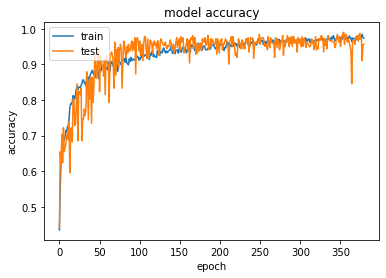

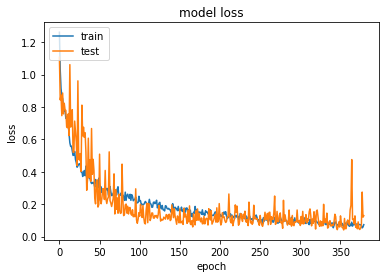

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [19]:
history.history

{'loss': [1.261001706123352,
  1.02814519405365,
  0.9143219590187073,
  0.8677809834480286,
  0.8504735827445984,
  0.8071078658103943,
  0.7744204998016357,
  0.7795473337173462,
  0.729467511177063,
  0.7377765774726868,
  0.6970745325088501,
  0.6878398060798645,
  0.6363490223884583,
  0.5780782699584961,
  0.5565515756607056,
  0.5573681592941284,
  0.5293375849723816,
  0.5004240274429321,
  0.5041040182113647,
  0.5254775881767273,
  0.4749257266521454,
  0.4563976526260376,
  0.42802634835243225,
  0.43605002760887146,
  0.4470081925392151,
  0.44989916682243347,
  0.437265545129776,
  0.39894458651542664,
  0.40169262886047363,
  0.3709307610988617,
  0.3850313723087311,
  0.407600075006485,
  0.37580180168151855,
  0.4351463317871094,
  0.36045464873313904,
  0.3748849928379059,
  0.39847010374069214,
  0.36045730113983154,
  0.3622654676437378,
  0.33823585510253906,
  0.3274824321269989,
  0.32959893345832825,
  0.3353496193885803,
  0.3279326558113098,
  0.305614858865737